In [1228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1229]:
matches=pd.read_csv('matches.csv')
matches

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [1230]:
delivery=pd.read_csv('deliveries.csv')
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [1231]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [1232]:
delivery.info()
delivery


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


<h3>The data needed for prediction:</h3>
<h4>crr=Current Run Rate, rrr-Required Run R|ate</h4>
<img src="data.jpg">

In [1234]:
total_score_df=delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [1235]:
total_score_df=total_score_df[total_score_df['inning']==1]

In [1236]:
total_score_df['total_runs']=total_score_df['total_runs']+1
print(total_score_df)

      match_id  inning  total_runs
0            1       1         208
2            2       1         185
4            3       1         184
6            4       1         164
8            5       1         158
...        ...     ...         ...
1518     11347       1         144
1520     11412       1         137
1522     11413       1         172
1524     11414       1         156
1526     11415       1         153

[756 rows x 3 columns]


In [1237]:
total_score_df.columns
print(type(total_score_df))

<class 'pandas.core.frame.DataFrame'>


In [1238]:
match_df=matches.merge(total_score_df[['match_id', 'total_runs']], left_on='id', right_on='match_id')

In [1239]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [1240]:
teams=['Sunrisers Hyderabad',
       'Mumbai Indians', 
       'Royal Challengers Bangalore',
       'Kolkata Knight Riders',
       'Kings XI Punjab',
       'Chennai Super Kings',
       'Rajasthan Royals',
       'Delhi Capitals']

In [1241]:
match_df['team1']=match_df['team1'].replace('Delhi Daredevils','Delhi Capitals')
match_df['team2']=match_df['team2'].replace('Delhi Daredevils','Delhi Capitals')

In [1242]:
match_df['team1']=match_df['team1'].replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2']=match_df['team2'].replace('Deccan Chargers','Sunrisers Hyderabad')

In [1243]:
match_df=match_df[match_df['team1'].isin(teams)]

In [1244]:
match_df=match_df[match_df['team2'].isin(teams)]

In [1245]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,208
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,158
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,179
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,149
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,144
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,137
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,172
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,156


In [1246]:
match_df=match_df[match_df['dl_applied']==0]

In [1247]:
match_df.shape

(626, 20)

In [1248]:
match_df.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'match_id', 'total_runs'],
      dtype='object')

In [1249]:
match_df=match_df[['match_id','city','winner','total_runs']]

In [1250]:
match_df

,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,208
4,5,Bangalore,Royal Challengers Bangalore,158
6,7,Mumbai,Mumbai Indians,179
7,8,Indore,Kings XI Punjab,149
9,10,Mumbai,Mumbai Indians,159
...,...,...,...,...
751,11347,Mumbai,Mumbai Indians,144
752,11412,Chennai,Mumbai Indians,137
753,11413,Visakhapatnam,Delhi Capitals,172
754,11414,Visakhapatnam,Chennai Super Kings,156


In [1251]:
delivery_df=match_df.merge(delivery,on="match_id")

In [1252]:
delivery_df=delivery_df[delivery_df['inning']==2]

In [1253]:
delivery_df.shape

(72413, 24)

In [1254]:
delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72413 entries, 125 to 149577
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   match_id          72413 non-null  int64 
 1   city              71581 non-null  object
 2   winner            72386 non-null  object
 3   total_runs_x      72413 non-null  int64 
 4   inning            72413 non-null  int64 
 5   batting_team      72413 non-null  object
 6   bowling_team      72413 non-null  object
 7   over              72413 non-null  int64 
 8   ball              72413 non-null  int64 
 9   batsman           72413 non-null  object
 10  non_striker       72413 non-null  object
 11  bowler            72413 non-null  object
 12  is_super_over     72413 non-null  int64 
 13  wide_runs         72413 non-null  int64 
 14  bye_runs          72413 non-null  int64 
 15  legbye_runs       72413 non-null  int64 
 16  noball_runs       72413 non-null  int64 
 17  penalty_runs  

In [1255]:
print((delivery_df['total_runs_y']==np.NAN).sum())

0


In [1256]:
# Check data type
print(delivery_df['total_runs_y'].dtype)

# Convert to numeric
delivery_df['total_runs_y'] = pd.to_numeric(delivery_df['total_runs_y'], errors='coerce')

# Fill missing values
delivery_df['total_runs_y'] = delivery_df['total_runs_y'].fillna(0)

# Compute cumulative sum
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

delivery_df

int64


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,1,0,1,NaN,NaN,NaN,1
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,2,0,2,NaN,NaN,NaN,3
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,4,0,4,NaN,NaN,NaN,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,1,0,1,NaN,NaN,NaN,152
149574,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,2,0,2,NaN,NaN,NaN,154
149575,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,1,0,1,SR Watson,run out,KH Pandya,155
149576,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,2,0,2,NaN,NaN,NaN,157


In [1257]:
delivery_df['runs_left']=delivery_df['total_runs_x']-delivery_df['current_score']

In [1258]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,1,0,1,NaN,NaN,NaN,1,207
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,207
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,207
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,2,0,2,NaN,NaN,NaN,3,205
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,4,0,4,NaN,NaN,NaN,7,201


In [1259]:
delivery_df['balls_left']=126-(delivery_df['ball']+delivery_df['over']*6)

In [1260]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,207,119
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,118
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,207,117
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,205,116
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,201,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,1,4
149574,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-1,3
149575,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-2,2
149576,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-4,1


In [1261]:
delivery_df['player_dismissed']=delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed']=delivery_df['player_dismissed'].apply(lambda x: x if x=="0" else "1")

In [1262]:
delivery_df['player_dismissed'].value_counts()

player_dismissed
0    68860
1     3553
Name: count, dtype: int64

In [1263]:
delivery_df['player_dismissed']=delivery_df['player_dismissed'].astype('int')

In [1264]:
# Ensure 'player_dismissed' is converted to numeric, coercing any errors to NaN
delivery_df['player_dismissed'] = pd.to_numeric(delivery_df['player_dismissed'], errors='coerce')

# Check for missing values or invalid entries
print(delivery_df['player_dismissed'].isna().sum())  # Output how many NaNs exist

# Step 3: Calculate the cumulative sum of 'player_dismissed' grouped by 'match_id'
# Group by 'match_id' and apply cumsum to 'player_dismissed'
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values

# Verify the results
print(wickets)


0
[0 0 0 ... 6 6 7]


In [1265]:
delivery_df['wickets']=10-wickets
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,207,119,10
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,118,10
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,207,117,10
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,205,116,10
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,201,115,10


In [1266]:
#crr=runs/overs
delivery_df['crr']=delivery_df['current_score']*6/(120-delivery_df['balls_left'])

In [1267]:
delivery_df['rrr']=(delivery_df['runs_left']*6)/(delivery_df['balls_left'])

In [1268]:
delivery_df.sample(5)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr
37399,191,Mumbai,Mumbai Indians,156,2,Mumbai Indians,Kolkata Knight Riders,13,3,SS Tiwary,...,4,0,NaN,NaN,100,56,45,9,8.000000,7.466667
143725,11326,Kolkata,Royal Challengers Bangalore,220,2,Kolkata Knight Riders,Royal Challengers Bangalore,16,1,N Rana,...,4,0,NaN,NaN,138,82,29,6,9.098901,16.965517
44466,220,Nagpur,Deccan Chargers,152,2,Royal Challengers Bangalore,Deccan Chargers,12,4,JH Kallis,...,1,0,NaN,NaN,80,72,50,8,6.857143,8.640000
58035,306,Chennai,Royal Challengers Bangalore,186,2,Mumbai Indians,Royal Challengers Bangalore,3,4,AC Blizzard,...,0,0,NaN,NaN,20,166,104,10,7.500000,9.576923
32008,169,Durban,Chennai Super Kings,117,2,Kings XI Punjab,Chennai Super Kings,3,5,LA Pomersbach,...,1,0,NaN,NaN,12,105,103,9,4.235294,6.116505


In [1269]:
delivery_df['Result'] = delivery_df.apply(lambda x: 1 if x['winner'] == x['batting_team'] else 0, axis=1)

In [1270]:
delivery_df['Result'].value_counts()

Result
1    38062
0    34351
Name: count, dtype: int64

In [1271]:
final_df=delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','Result']]

In [1272]:
final_df=final_df.sample(final_df.shape[0])

In [1273]:
final_df.dropna(inplace=True)

In [1274]:
final_df=final_df[final_df['balls_left']!=0]

In [1275]:
X = final_df.drop(columns='Result')
y=final_df['Result']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [1276]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer(
    [
        ('trf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
    ],
    remainder='passthrough'
)

<h2>Logistic Regression</h2>

In [1278]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [1279]:
pipe=Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [1280]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [1281]:
y_predicted=pipe.predict(X_test)

In [1282]:
from sklearn.metrics import classification_report,confusion_matrix

In [1283]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      6767
           1       0.81      0.82      0.81      7502

    accuracy                           0.80     14269
   macro avg       0.80      0.80      0.80     14269
weighted avg       0.80      0.80      0.80     14269



<h2>Random Forest Classifier</h2>

In [1285]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import pickle

pipe_rf = Pipeline(steps=[
    ('step1', trf),  # ColumnTransformer
    ('step2', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Fit and predict
pipe_rf.fit(X_train, y_train)
predictions_rf = pipe_rf.predict(X_test)

# Example: Evaluate Random Forest
print("Random Forest Classifier:")
print(classification_report(y_test, predictions_rf))
pickle.dump(pipe_rf,open('RFModel.pkl','wb'))


Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6767
           1       1.00      1.00      1.00      7502

    accuracy                           1.00     14269
   macro avg       1.00      1.00      1.00     14269
weighted avg       1.00      1.00      1.00     14269



In [1286]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,Result
33985,Delhi Daredevils,Kings XI Punjab,Chandigarh,114,91,8,143,6.000000,7.516484,1
122386,Sunrisers Hyderabad,Rajasthan Royals,Hyderabad,59,76,9,134,10.227273,4.657895,1
53527,Kings XI Punjab,Mumbai Indians,Mumbai,87,54,8,160,6.636364,9.666667,0
39059,Chennai Super Kings,Rajasthan Royals,Ahmedabad,146,95,9,178,7.680000,9.221053,0
25024,Kings XI Punjab,Royal Challengers Bangalore,Durban,56,38,7,146,6.585366,8.842105,0
...,...,...,...,...,...,...,...,...,...,...
79470,Rajasthan Royals,Royal Challengers Bangalore,Jaipur,128,86,9,172,7.764706,8.930233,1
116585,Sunrisers Hyderabad,Kings XI Punjab,Hyderabad,71,79,10,144,10.682927,5.392405,1
79042,Royal Challengers Bangalore,Mumbai Indians,Mumbai,87,18,3,195,6.352941,29.000000,0
121904,Kings XI Punjab,Delhi Daredevils,Mohali,90,72,8,173,10.375000,7.500000,1


In [1287]:
pickle.dump(teams,open('teams.pkl','wb'))
print(X_train.columns)
type(teams)

Index(['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left',
       'wickets', 'total_runs_x', 'crr', 'rrr'],
      dtype='object')


list

In [1288]:
city=list(final_df['city'].unique())

In [1289]:
city
print(type(city))

<class 'list'>


In [1290]:
pickle.dump(city,open('city.pkl','wb'))


<h2>SVC</h2>

In [1292]:
'''from sklearn.svm import SVC

pipe_svm = Pipeline(steps=[
    ('step1', trf),
    ('step2', SVC(kernel='linear', C=1.0, random_state=42))
])

pipe_svm.fit(X_train, y_train)
predictions_svm = pipe_svm.predict(X_test)
print("SVC:")
print(classification_report(y_test, predictions_svm))
'''

'from sklearn.svm import SVC\n\npipe_svm = Pipeline(steps=[\n    (\'step1\', trf),\n    (\'step2\', SVC(kernel=\'linear\', C=1.0, random_state=42))\n])\n\npipe_svm.fit(X_train, y_train)\npredictions_svm = pipe_svm.predict(X_test)\nprint("SVC:")\nprint(classification_report(y_test, predictions_svm))\n'

<h2>Gradient Boosting Classifier</h2>

In [1294]:
'''from sklearn.ensemble import GradientBoostingClassifier

pipe_gb = Pipeline(steps=[
    ('step1', trf),
    ('step2', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42))
])

pipe_gb.fit(X_train, y_train)
print("Gradient Boost:")
print(classification_report(y_test, predictions_gb))'''

'from sklearn.ensemble import GradientBoostingClassifier\n\npipe_gb = Pipeline(steps=[\n    (\'step1\', trf),\n    (\'step2\', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42))\n])\n\npipe_gb.fit(X_train, y_train)\nprint("Gradient Boost:")\nprint(classification_report(y_test, predictions_gb))'

<h2>K-Nearest Neighbors (KNN)</h2>

In [1296]:
'''from sklearn.neighbors import KNeighborsClassifier

pipe_knn = Pipeline(steps=[
    ('step1', trf),
    ('step2', KNeighborsClassifier(n_neighbors=5))
])

pipe_knn.fit(X_train, y_train)
predictions_knn = pipe_knn.predict(X_test)
print("K-Nearest Neighbors (KNN:")
print(classification_report(y_test, predictions_knn))'''

'from sklearn.neighbors import KNeighborsClassifier\n\npipe_knn = Pipeline(steps=[\n    (\'step1\', trf),\n    (\'step2\', KNeighborsClassifier(n_neighbors=5))\n])\n\npipe_knn.fit(X_train, y_train)\npredictions_knn = pipe_knn.predict(X_test)\nprint("K-Nearest Neighbors (KNN:")\nprint(classification_report(y_test, predictions_knn))'

In [1380]:
def match_progression_dataframe(x_df, match_id, pipe,model):
    """
    Generate over-by-over progression for a specific match and ensure data is shown for all overs up to the 20th.

    Parameters:
    x_df (pd.DataFrame): DataFrame containing match data.
    match_id (int): ID of the match to analyze.
    pipe (Pipeline): Pretrained model pipeline for predictions.

    Returns:
    pd.DataFrame: DataFrame containing over-wise match progression data.
    """
    # Filter data for the specified match_id
    match_data = x_df[x_df['match_id'] == match_id].copy()
    match_data= match_data[match_data['ball']==6]
    temp_df=match_data[['batting_team','over','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']]
    temp_df=temp_df[match_data['balls_left']!=0]
    probabilities = pipe.predict_proba(temp_df.drop(columns=['over']))
    temp_df['win_probability'] = probabilities[:, 1]*100
    temp_df['loss_probability'] = probabilities[:, 0]*100
    temp_df['runs']=temp_df['total_runs_x']-temp_df['runs_left']
    temp_df = temp_df.reset_index(drop=True)
    first_run=temp_df['runs'][0]
    temp_df['runs'] = temp_df['runs'].diff()
    #temp_df['runs'][0]=first_run

    temp_df['wickets_after_over']=10-temp_df['wickets']
    #temp_df = temp_df.reset_index(drop=True)
    first_wicket=temp_df['wickets_after_over'][0]
    temp_df['wickets_after_over'] = temp_df['wickets_after_over'].diff()
    #temp_df['wickets_after_over'][0]=first_wicket
    temp_df.loc[0, 'runs'] = first_run
    temp_df.loc[0, 'wickets_after_over'] = first_wicket
    result_df=temp_df[['over','runs','wickets_after_over','win_probability','loss_probability']]
    print(result_df)
    # Plotting the over-wise progression
    fig, ax1 = plt.subplots(figsize=(10,6))
    
    # Plot runs and wickets on the first y-axis
    ax1.set_xlabel('Over')
    ax1.set_ylabel('Runs Scored / Wickets', color='tab:blue')
    ax1.plot(result_df['over'], result_df['runs'], color='tab:blue', label='Runs Scored', marker='o')
    ax1.plot(result_df['over'], result_df['wickets_after_over'], color='tab:orange', label='Wickets', marker='s')
    
    # Creating a second y-axis to plot the win and loss probabilities
    ax2 = ax1.twinx()
    ax2.set_ylabel('Win/Loss Probability (%)', color='tab:green')
    ax2.plot(result_df['over'], result_df['win_probability'], color='tab:green', label='Win Probability', linestyle='--', marker='x')
    ax2.plot(result_df['over'], result_df['loss_probability'], color='tab:red', label='Loss Probability', linestyle=':', marker='x')
    
    # Adding Legends
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    
    # Show the plot
    plt.title(f'Match Progression ({model}) (Match ID: {match_id})')
    plt.show()



    


In [1382]:
#Winning match-ids
delivery_df[delivery_df['Result']==1]['match_id'].unique()

array([    7,     8,    10,    11,    12,    18,    22,    31,    35,
          37,    39,    45,    47,    58,    62,    63,    64,    65,
          66,    68,    70,    71,    72,    73,    75,    77,    79,
          80,    83,    84,    85,    86,    87,    89,    90,    93,
          94,    96,    99,   104,   105,   108,   109,   112,   113,
         114,   116,   117,   121,   127,   129,   131,   133,   134,
         136,   140,   142,   143,   146,   148,   150,   151,   152,
         154,   156,   157,   159,   161,   162,   163,   166,   167,
         168,   170,   172,   173,   177,   178,   180,   181,   184,
         185,   188,   191,   194,   195,   201,   202,   205,   208,
         212,   214,   215,   216,   217,   218,   222,   223,   224,
         225,   227,   228,   230,   233,   236,   238,   241,   242,
         243,   246,   249,   251,   258,   263,   267,   270,   276,
         279,   288,   299,   302,   303,   304,   305,   308,   309,
         316,   318,

    over  runs  wickets_after_over  win_probability  loss_probability
0      1   2.0                 0.0        55.571336         44.428664
1      2   8.0                 0.0        61.193292         38.806708
2      3  12.0                 0.0        71.466577         28.533423
3      4  19.0                 0.0        86.023738         13.976262
4      5   7.0                 0.0        87.308014         12.691986
5      6   7.0                 0.0        88.528406         11.471594
6      7  13.0                 0.0        92.711617          7.288383
7      8   4.0                 1.0        86.292360         13.707640
8      9   7.0                 0.0        87.649319         12.350681
9     10  10.0                 0.0        90.657471          9.342529
10    11   2.0                 0.0        88.835937         11.164063
11    12  10.0                 0.0        91.609422          8.390578
12    13   9.0                 0.0        93.376759          6.623241
13    14   3.0      

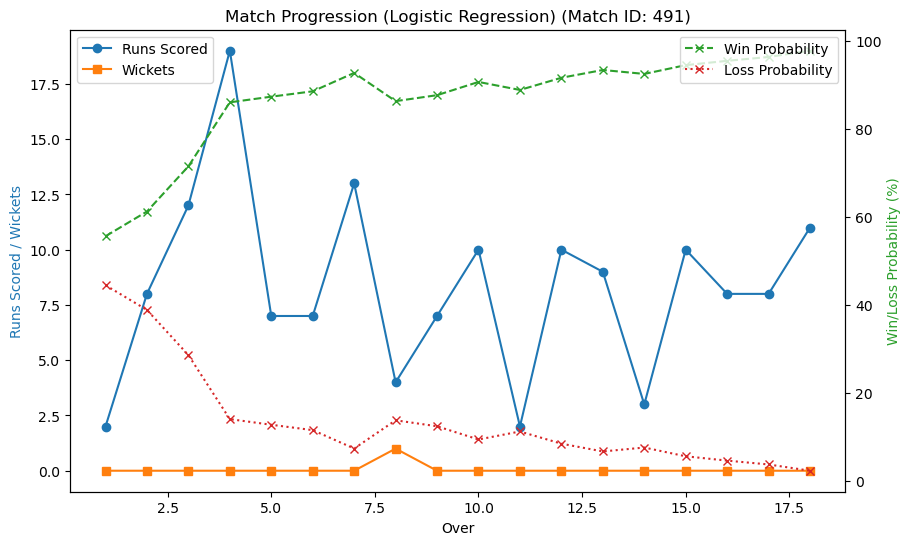

    over  runs  wickets_after_over  win_probability  loss_probability
0      1   2.0                 0.0            100.0               0.0
1      2   8.0                 0.0             98.0               2.0
2      3  12.0                 0.0             90.0              10.0
3      4  19.0                 0.0            100.0               0.0
4      5   7.0                 0.0            100.0               0.0
5      6   7.0                 0.0            100.0               0.0
6      7  13.0                 0.0            100.0               0.0
7      8   4.0                 1.0             99.0               1.0
8      9   7.0                 0.0            100.0               0.0
9     10  10.0                 0.0            100.0               0.0
10    11   2.0                 0.0             98.0               2.0
11    12  10.0                 0.0            100.0               0.0
12    13   9.0                 0.0            100.0               0.0
13    14   3.0      

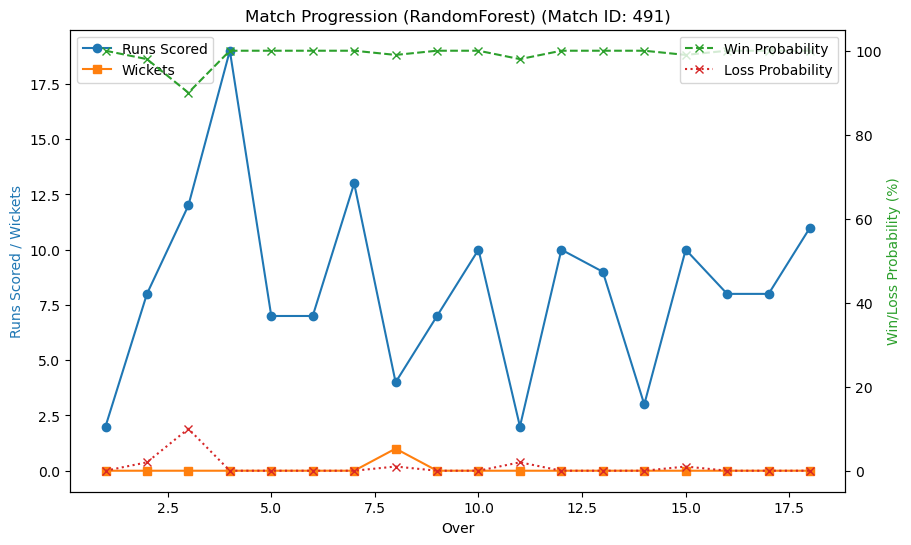

In [1384]:
match_id=491
model='Logistic Regression'
match_progression_dataframe(delivery_df, match_id, pipe,model)
model='RandomForest'
match_progression_dataframe(delivery_df, match_id, pipe_rf,model)
#delivery_df[delivery_df['match_id']==69].tail()
